This project analyzes a historical dataset of airplane crashes from 1908 to 2019 to identify long-term patterns in aviation safety. By exploring trends in fatalities, crash frequency, and operator-related risks, the analysis provides an insight into how aviation has evolved over time. Our goal is to understand the major factors behind crash outcomes and highlight how safety standards have improved throughout the modern aviation era.

In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive (9).zip to archive (9).zip


In [2]:

#Import libraries
!pip install seaborn wordcloud

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import zipfile
import os

In [4]:
#Extract the ZIP file
zip_path = "archive (9).zip"  # the exact filename you uploaded

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data")

os.listdir("data")


['Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv']

In [5]:
#Load the dataset
csv_path = "data/Airplane_Crashes_and_Fatalities_Since_1908_20190820105639.csv"

df = pd.read_csv(csv_path)
df.head()


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,09/07/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,07/12/1912,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [6]:
#View basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4967 entries, 0 to 4966
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4967 non-null   object 
 1   Time                   3457 non-null   object 
 2   Location               4963 non-null   object 
 3   Operator               4957 non-null   object 
 4   Flight #               1315 non-null   object 
 5   Route                  4192 non-null   object 
 6   AC Type                4952 non-null   object 
 7   Registration           4694 non-null   object 
 8   cn/ln                  4299 non-null   object 
 9   Aboard                 4949 non-null   float64
 10  Aboard Passangers      4738 non-null   float64
 11  Aboard Crew            4741 non-null   float64
 12  Fatalities             4959 non-null   float64
 13  Fatalities Passangers  4725 non-null   float64
 14  Fatalities Crew        4726 non-null   float64
 15  Grou

In [7]:
#Summary statistics
df.describe(include="all")


,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
count,4967,3457,4963,4957,1315,4192,4952,4694,4299,4949.000000,4738.000000,4741.000000,4959.000000,4725.000000,4726.000000,4926.000000,4903
unique,4539,1062,4101,2242,883,3799,2447,4661,3869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4808
top,08/31/1988,15:00,"Moscow, Russia",Aeroflot,-,Training,Douglas DC-3,49,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Crashed under unknown circumstances.
freq,4,37,17,255,36,92,333,3,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.088301,26.898691,4.479646,22.338173,19.017566,3.579348,1.728177,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.438282,44.010591,3.489021,35.026176,34.114849,3.170223,55.708966,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.000000,12.000000,4.000000,11.000000,8.000000,3.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,0.000000,NaN


In [8]:
#Clean the dataset
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df = df.dropna(subset=['Year'])
df.head()



,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary,Year
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...,1909
2,1912-07-12,06:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,1913


In [9]:
#Missing values check
df.isnull().sum()


,0
Date,0
Time,1510
Location,4
Operator,10
Flight #,3652
Route,775
AC Type,15
Registration,273
cn/ln,668
Aboard,18


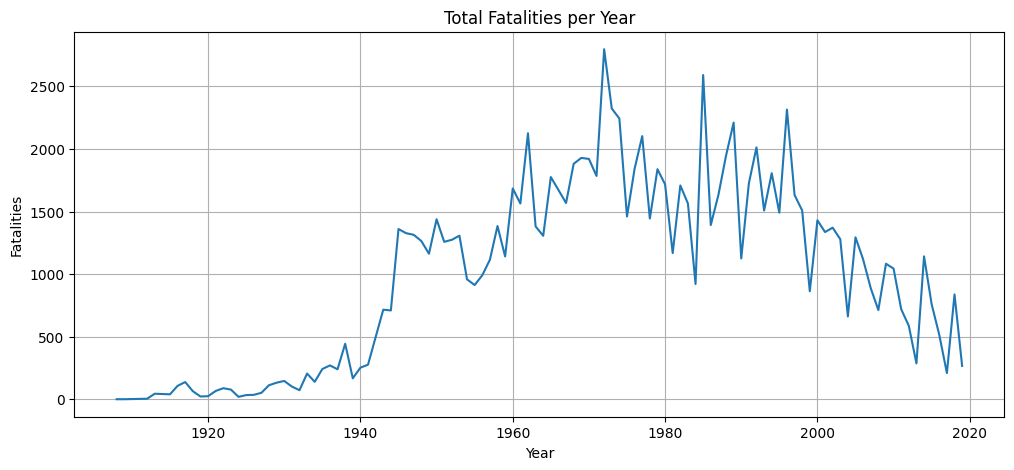

In [10]:
#Fatalities per year (line plot)
plt.figure(figsize=(12,5))
df.groupby('Year')['Fatalities'].sum().plot()
plt.title("Total Fatalities per Year")
plt.xlabel("Year")
plt.ylabel("Fatalities")
plt.grid(True)
plt.show()


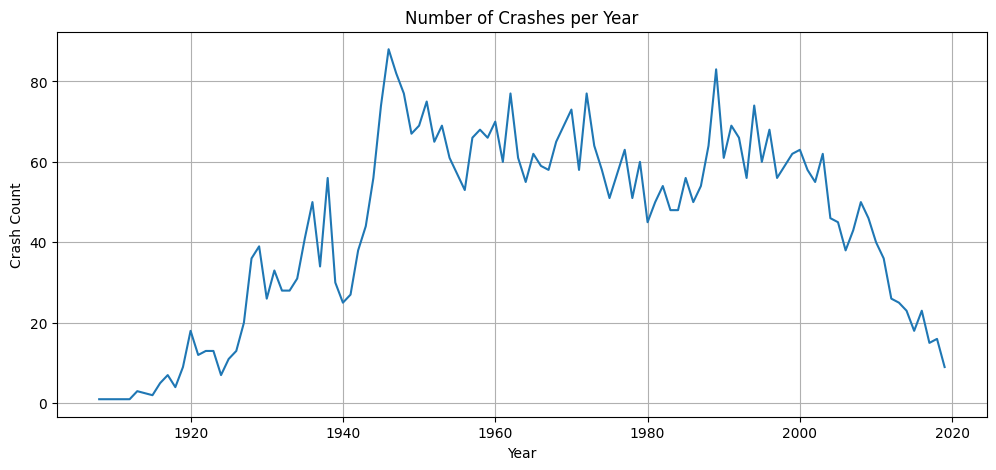

In [11]:
#Number of crashes per year
plt.figure(figsize=(12,5))
df.groupby('Year').size().plot()
plt.title("Number of Crashes per Year")
plt.xlabel("Year")
plt.ylabel("Crash Count")
plt.grid(True)
plt.show()


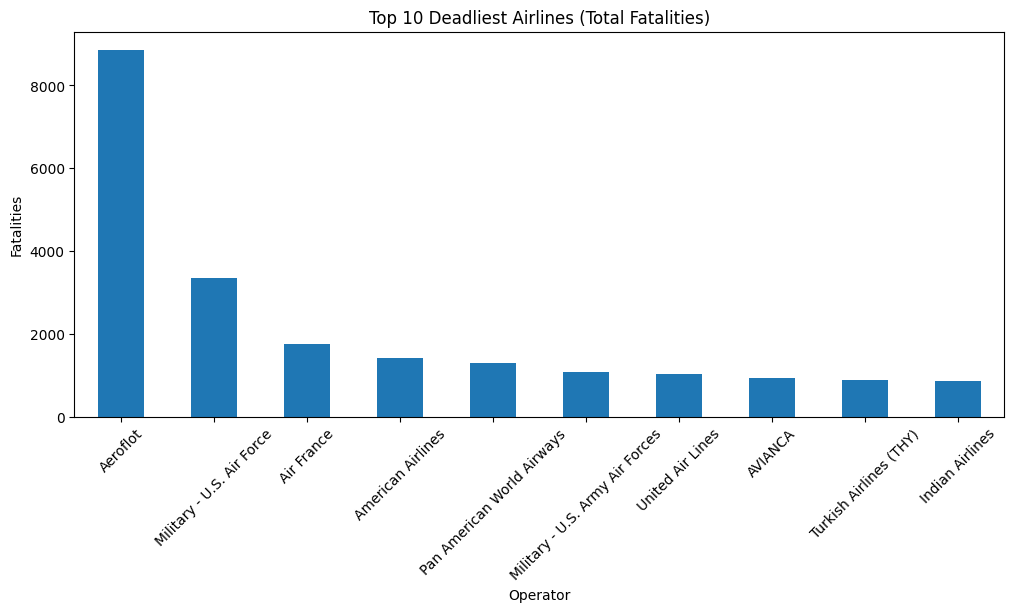

In [12]:
#Top 10 operators by fatalities
plt.figure(figsize=(12,5))
df.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Deadliest Airlines (Total Fatalities)")
plt.ylabel("Fatalities")
plt.xticks(rotation=45)
plt.show()


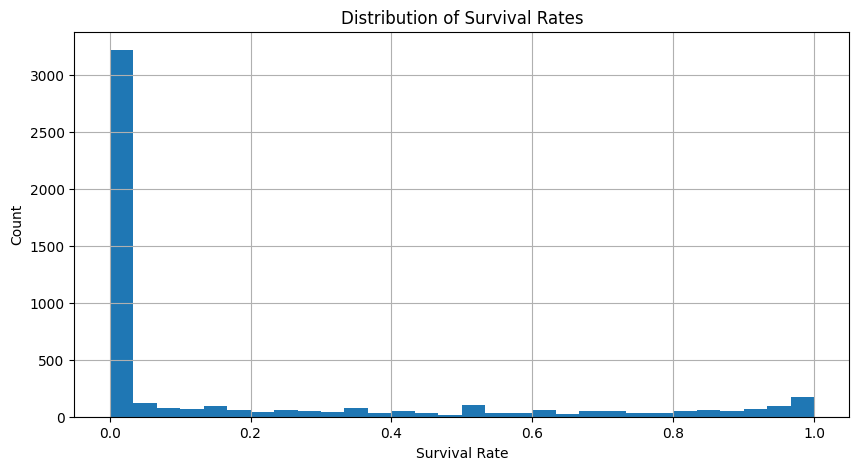

In [13]:
#Survival rate distribution
df['SurvivalRate'] = 1 - (df['Fatalities'] / df['Aboard'])

df['SurvivalRate'].hist(bins=30, figsize=(10,5))
plt.title("Distribution of Survival Rates")
plt.xlabel("Survival Rate")
plt.ylabel("Count")
plt.show()


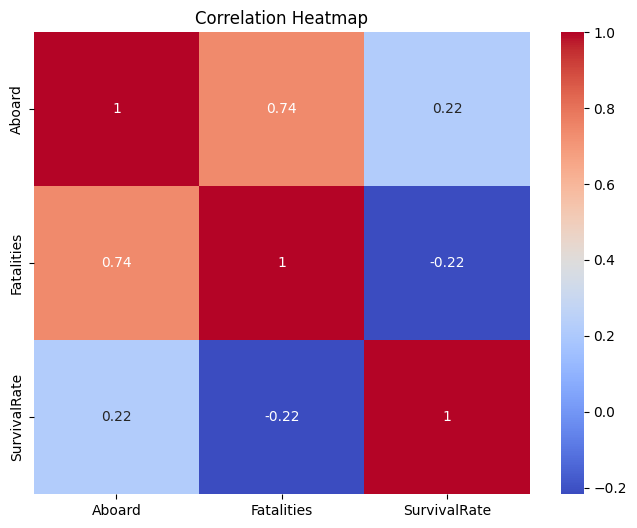

In [15]:
#Heatmap of correlations
plt.figure(figsize=(8,6))
sns.heatmap(df[['Aboard','Fatalities','SurvivalRate']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



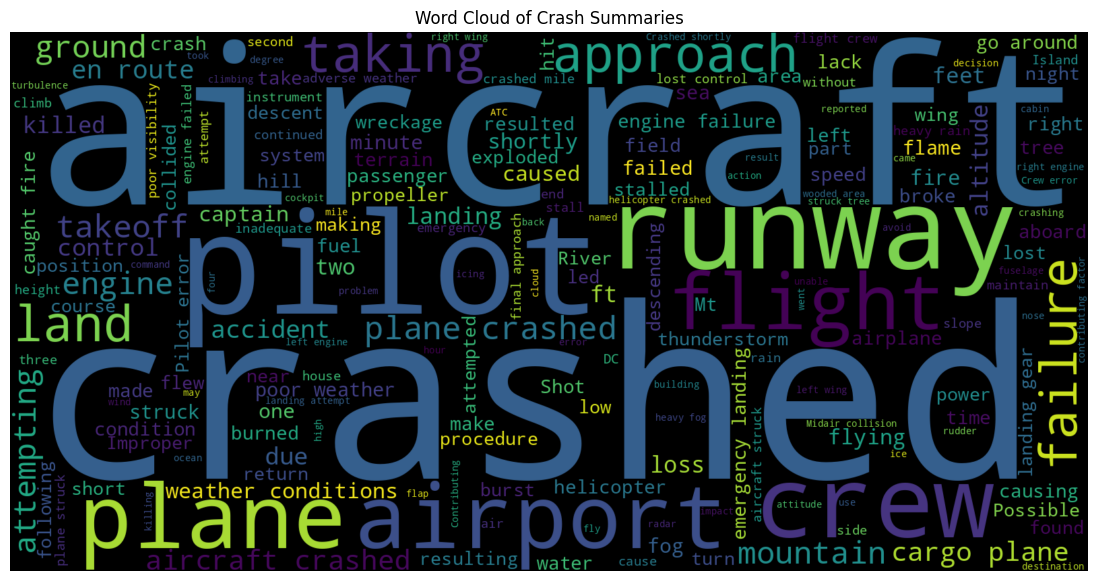

In [16]:
#Word Cloud of crash summaries
text = " ".join(str(t) for t in df['Summary'] if isinstance(t, str))

wordcloud = WordCloud(width=1600, height=800).generate(text)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Crash Summaries")
plt.show()


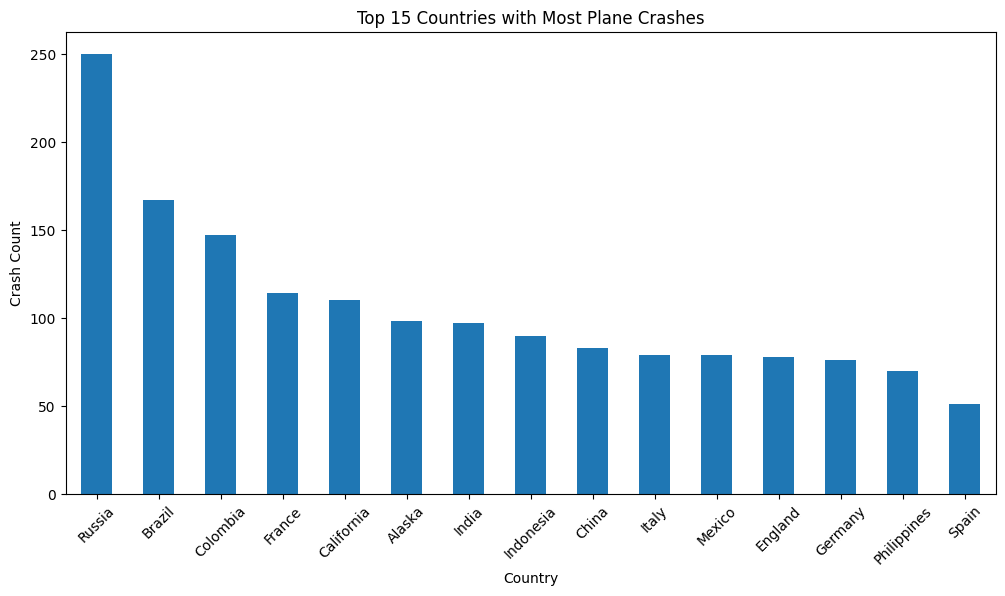

In [19]:
#Crashes by country
df['Country'] = df['Location'].str.extract(r',\s*(.*)$')  # extract country from end of location string

df['Country'].value_counts().head(15).plot(kind='bar', figsize=(12,6))
plt.title("Top 15 Countries with Most Plane Crashes")
plt.ylabel("Crash Count")
plt.xticks(rotation=45)
plt.show()


Conclusions: Based on our analysis, the highest number of incidents occurred during the early and mid-20th century when aviation technology and safety standards were still new. Fatalities also show peaks during war and in the decades before modern safety regulations were established. A small number of operators such as Aeroflot account for a disproportionately large share of total fatalities, highlighting historical safety variations between airlines. It is also important to note that aviation accidents differ by country, with Russia/USSR having the most accidents. Survival rates vary, but many crashes had no survivors, reflecting the severity of older aviation accidents. Overall, the data shows that aviation safety has significantly improved over time, with fewer crashes and more sophisticated safety standards and technology in recent decades. (explanations were generated with the help of Chatgpt)